<a href="https://colab.research.google.com/github/LucasLessa1/IEEE_CIS_Trainee/blob/main/4_Per%C3%ADodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré - Processamento


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import math
import plotly.express as px
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/IEEE/creditcard.csv")
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
nan = df.isna()
np.unique(nan.to_numpy(), return_counts=False) # obtendo os valores únicos de faltantes e não faltantes
                                              # convertendo da pandas para a numpy

array([False])

# Normalização


In [6]:
del df["Time"]

In [7]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [8]:
df_1 = df.copy()

In [9]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [10]:
df = min_max_scaler.fit_transform(df)
print(df)

[[9.35192337e-01 7.66490419e-01 8.81364903e-01 ... 3.12696634e-01
  5.82379309e-03 0.00000000e+00]
 [9.78541955e-01 7.70066651e-01 8.40298490e-01 ... 3.13422663e-01
  1.04705276e-04 0.00000000e+00]
 [9.35217023e-01 7.53117667e-01 8.68140819e-01 ... 3.11911316e-01
  1.47389219e-02 0.00000000e+00]
 ...
 [9.90904812e-01 7.64079694e-01 7.81101998e-01 ... 3.12584864e-01
  2.64215395e-03 0.00000000e+00]
 [9.54208999e-01 7.72855742e-01 8.49587129e-01 ... 3.15245157e-01
  3.89238944e-04 0.00000000e+00]
 [9.49231759e-01 7.65256401e-01 8.49601462e-01 ... 3.13400843e-01
  8.44648509e-03 0.00000000e+00]]


Dados normalizados.

In [11]:
df = pd.DataFrame(df, columns=df_1.columns)
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


In [12]:
df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


In [13]:
df["Class"].value_counts()

0.0    284315
1.0       492
Name: Class, dtype: int64

#Perceptron from Scrath

Atividade Obrigatória

Classificação binária para prever fraudes nas transações com
cartões de crédito usando um Perceptron com uma camada
oculta feito somente com numpy:

1.   Separar a label das features e o dataset em subsets de
treinamento e teste;
2.   Inicialização randômica dos pesos;
3.   Definir a função de ativação e calcular sua derivada;
4.   Treinar o modelo testando diferentes valores de épocas
e
learning
rate,
identificando
quando
acontece
Overfitting e Underfitting.

5. Fazer as previsões nos dados de teste e avaliar o
modelo.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
label = 'Class'
x = np.array(df.drop(label, axis=1))
y = np.array(df[label])

In [16]:
print(x.shape)
print(y.shape)

(284807, 29)
(284807,)


##Split Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0 )

In [18]:
len(X_train[0])

29

1. Define a arquitetura da rede (quantas camadas, quantos neurônios em cada camada, função de ativação ...)
2. Os pesos são inicializados aleatoriamente
3. No processo de treinamento você vai ajustando os pesos com base nos dados com que você alimenta a rede (aqui entra backpropagation, gradient descent, loss)
4. Quando o treinamento finalizar, os pesos da sua rede ficam estáticos, ou seja, eles não mudam mais
5. Ao fazer uma previsão (alimentar a rede com dados que ela nunca viu e checar o resultado), o que é feito é apenas passar os dados pela rede (que já tem os pesos definidos) e verificar a saída
é por isso que em ML/DL o pré processamento dos dados é muito importante
Seja pra treinar ou prever
Uma vez que o treinamento acabou (que seria o .fit), os parâmetros do seu modelo são 'congelados'
então a rede sempre espera os dados em um determinado formato que foi determinado na definição da arquitetura/treinamento

In [19]:
X_train.shape

(227845, 29)

Como temos 29 colunas, teremos 29 neurônios.

In [20]:
from numpy import exp

In [21]:
weight = np.random.randn(29)

In [22]:
n=X_train.shape[1]
n

29

In [23]:
a =np.array([[1,2,3],[4,5,6]])
a.shape
print(a.reshape)

<built-in method reshape of numpy.ndarray object at 0x7f7ac4d21e10>


In [24]:
w1 = np.random.rand(29)  # Layer 1
b1 = np.random.rand(4)
w1

array([0.61925633, 0.0289573 , 0.99356462, 0.56778625, 0.5175795 ,
       0.10903177, 0.60236273, 0.24932146, 0.78990484, 0.29313812,
       0.78941332, 0.84284009, 0.238793  , 0.99809814, 0.53159688,
       0.86515271, 0.4553287 , 0.49993807, 0.15257722, 0.62862918,
       0.72494896, 0.82599632, 0.18174775, 0.62807145, 0.8881294 ,
       0.95315586, 0.90792766, 0.78545374, 0.18390968])

In [25]:
-w1

array([-0.61925633, -0.0289573 , -0.99356462, -0.56778625, -0.5175795 ,
       -0.10903177, -0.60236273, -0.24932146, -0.78990484, -0.29313812,
       -0.78941332, -0.84284009, -0.238793  , -0.99809814, -0.53159688,
       -0.86515271, -0.4553287 , -0.49993807, -0.15257722, -0.62862918,
       -0.72494896, -0.82599632, -0.18174775, -0.62807145, -0.8881294 ,
       -0.95315586, -0.90792766, -0.78545374, -0.18390968])

##Inicialização

In [26]:
class Inicialização():
  def __init__(self):
    pass
 
  def weight_bias(self, n_features, X):
    w1 = np.random.rand(n_features , X.shape[1])        # Layer 1
    b1 = np.random.rand(n_features)

    w2 = np.random.rand(n_features , X.shape[1])        # Layer 2
    b2 = np.random.rand(n_features)

    weight_and_bias = {"weight1": w1, "bias1": b1, "weight2": w2, "bias2": b2}
    return weight_and_bias


##Foward


In [27]:
class Foward():

  def __init__(self):
    pass
        
  def propagation(self, x, weight_bias):
   

    z1 = np.dot(weight_bias["weight1"], x) + weight_bias["bias1"]        #Calculando os outputs da primeira camada
    z1_active = np.tanh(z1)  # O próximo passo é passar esses outputs ,da primeira camada, na função de ativação

    z2 = np.dot(weight_bias["weight2"], z1) + weight_bias["bias2"]       # Mesma descrição do comentário acima
    z2_active = self.sigmoid(z2)
    
    active = {"z1": z1 ,"z2": z2 , "z1_active": z1_active , "z2_active": z2_active}
    return z2_active, active


  def sigmoid(self,z):
      return 1/(1+np.exp(-z))

##Cost

In [28]:
# class Cost():
  
#   def __init__(self) -> None:
#       pass
def Entropy(active_layers, y):
  #Tem-se muitas funções para calcular o custo, e para cada modelo tem um tipo ideal de função. 
  #Por falta de espertise, escolhi a que seria mais fácil de ser implementada. Cross-Entropy-Loss-Function
  #Com uma rápida pesquisada pude perceber que essa função tem importância significativa na Teoria de Informação
  #Mas basicamente calcula-se a probabilidade da distribuição dos dados.  https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e
  # Compute the cross-entropy cost
  entropy_cost = np.multiply(np.log(active_layers), x) + np.multiply((1-x), np.log(1 - active_layers))

  cost = - np.sum(entropy_cost) / x.shape[1]
 
  cost1 = float(np.squeeze(cost))
                                  
  return cost1

##Backward

In [29]:
class Backward():
  def __init__(self):   #I belive that will not necessary index and xi
    pass
  
 
  def backpropagation(self, active_layers, weight_and_bias, x, y):
    
    n_features =29
#Para a última camada (layer) faremos a diferença entre o valor da camada na função de ativação
#(isso quer dizer ajustá-la num intervalo binário) menos o valor esperado, esses dados são a "diferença mínima" da layer
    dz2 = active_layers["z2_active"] - y
#Para os pesos multiplicamos esse "Diferença mínima" pela primeira camada transposta (aplicada na função de ativação) e dvidimos pela quantidade de neurônios
    dw2 = (dz2*active_layers["z1_active"])/n_features
#Para os bias tiramos a média dessa "Diferença mz2_activeínima"
    db2 = (np.sum(dz2, keepdims=True)) #Vale ressaltar que o "keepdims" mantém em formato de array

    dz1 = np.multiply(np.dot(weight_and_bias["weight2"].T, dz2), 1 - np.power(active_layers["z1_active"], 2))
    dw1 = (1/n_features)*np.dot(dz1, x.T)
    db1 = (1/n_features)*np.sum(dz1, keepdims=True)

    gradient = {"derivate_w1": dw1, "derivate_b1": db1, "derivate_w2": dw2, "derivate_b2": db2}

    return gradient



##Gradient

In [30]:
class Gradient():
  def __init__(self) -> None:
      pass

  def descent(self, gradient, weight_and_bias, learning_rate=0.01):
    w1 = weight_and_bias['weight1']
    b1 = weight_and_bias['bias1']
    w2 = weight_and_bias['weight2']
    b2 = weight_and_bias['bias2']
   
    dw1 = gradient['derivate_w1']
    db1 = gradient['derivate_b1']
    dw2 = gradient['derivate_w2']
    db2 = gradient['derivate_b2']

    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    weight_and_bias = {"weight1": w1, "bias1": b1, "weight2": w2, "bias2": b2}
    
    return weight_and_bias

##Perceptron


In [31]:
class Perceptron():

  def __init__(self) -> None:

      self.weight_and_bias = None
      pass
        
  def fit(self, x, y, num_iterations = 1000):
    n_features = x.shape[1]
    init = Inicialização()
    self.weight_and_bias = init.weight_bias(n_features, x)
    
    w1 = self.weight_and_bias['weight1']
    b1 = self.weight_and_bias['bias1']
    w2 = self.weight_and_bias['weight2']
    b2 = self.weight_and_bias['bias2']
    
    forward = Foward()
    backward = Backward()
    gradient = Gradient()

    for i in range(0, num_iterations):

      z2_active, active = forward.propagation(x, self.weight_and_bias)

      cost = Entropy(z2_active, y)
      grads = backward.backpropagation(active, self.weight_and_bias, x, y)
      self.weight_and_bias = gradient.descent(grads, self.weight_and_bias)

    return self.weight_and_bias

  def prediction(self, x):
    forward = Foward()
    weight_bias, active = forward.propagation(x, self.weight_and_bias)
    predictions = np.round(active["z2_active"])
    
    return predictions

In [32]:
perceptron = Perceptron()

In [33]:
# perceptron.fit(X_train, y_test)

Nesse modelo, selecionarei somente uma parte do dataset para predição. Especificamente (29,29) do dataset.

##Selecionando aleatoriamente uma parte do data set

In [34]:
# generate random integer values
from random import seed
from random import randint
# seed random number generator
random_value_test = randint(0,len(X_test))

In [35]:
# X_test = X_test[random_value_test:random_value_test+29]

In [36]:
# y_pred  =perceptron.prediction(X_test)

In [37]:
from sklearn.metrics import classification_report, r2_score, mean_squared_error

In [38]:
y_test = y_test[random_value_test:random_value_test+29]

In [39]:
# erro = np.power(abs(y_pred - y_test),2)

In [40]:
# mean_square = np.square(erro)
# mean_square = np.sum(mean_square)

Não consegui terminar o perceptron. Fui muito ousado ao tentar usar as classes, fico muito triste por não conseguir concluir. Mas colocarei aqui minhas análises a cerca do que eu esperava. 

Ao analisar o dataset, pude perceber que a quantidade de valores 1 é maior que 0. 


1.   0.0  ---->    284315
2.   1.0  ---->     492

Para treinar esse dataset é necessário selecionar a mesma quantidade de zeros e uns. Porque daria overfitting.

#Perceptron by Sklearn

In [41]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [42]:
label = 'Class'
x = np.array(df.drop(label, axis=1))
y = np.array(df[label])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0 )

In [44]:
percep_x = Perceptron()

In [45]:
percep_x.fit(X_train, y_train)

Perceptron()

In [46]:
y_pred = percep_x.predict(X_test)

In [47]:
def score_accuracy(array1, array2):
#Basicamente essa função accuracy ela soma a quantidade de elementos iguais e divide pelo tamanho , no nosso caso, y_test
  accuracy = np.sum(array1==array2) / len(array1)
  return accuracy

In [48]:
metrics_multiclass = classification_report(y_test, y_pred)

print(metrics_multiclass)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56861
         1.0       0.86      0.38      0.52       101

    accuracy                           1.00     56962
   macro avg       0.93      0.69      0.76     56962
weighted avg       1.00      1.00      1.00     56962



Podemos ver por esses dados, que o treino foi viciado, ou seja, o modelo está mais acostumado ao 0 do que o 1.

Undersampling

In [49]:
df_new = df.copy()



aux = df_new.query('Class == 1')

X_1 = aux.drop('Class', axis = 1)

X_1 = np.array(X_1)



y_1 = aux[['Class', 'Amount']]

y_1 = y_1.drop('Amount', axis = 1)

y_1 = np.array(y_1)

In [50]:
value_zero = df.query("Class==0")
X_1 = value_zero.drop("Class", axis =1)
X_1 = np.array(X_1)

Y_1 = value_zero[['Class', 'Amount']]
Y_1 = Y_1.drop("Amount", axis =1)
Y_1 = np.array(Y_1)


value_one = df.query("Class==1")
X_2 = value_one.drop("Class", axis =1)
X_2 = np.array(X_2)

Y_2 = value_one[['Class', 'Amount']]
Y_2 = Y_2.drop("Amount", axis =1)
Y_2 = np.array(Y_2)

80% dos dados para treinar e os outros 20% para testar

In [51]:
X_train_2 = np.concatenate((X_1[:394], X_2[:394]))

X_test_2 = np.concatenate((X_1[:98], X_2[:98]))



Y_train_2 = np.concatenate((Y_1[:394], Y_2[:394]))

Y_test_2 = np.concatenate((Y_1[:98], Y_2[:98]))

In [52]:
percep_x = Perceptron()

In [53]:
percep_x.fit(X_train_2, Y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron()

In [54]:
y_pred = percep_x.predict(X_test_2)

In [55]:
metrics_multiclass = classification_report(Y_test_2, y_pred)

print(metrics_multiclass)

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        98
         1.0       1.00      0.86      0.92        98

    accuracy                           0.93       196
   macro avg       0.94      0.93      0.93       196
weighted avg       0.94      0.93      0.93       196



#Tensor Flow

Importando biblioteca

In [56]:
import tensorflow as tf
import tensorflow.keras as keras

In [57]:
shape = X_train_2.shape

In [66]:
model = keras.models.Sequential()  # Cria uma rede neural sequencial - feed foward

model.add(keras.layers.Dense(2, activation='relu', input_shape=X_train_2[0].shape)) # primeira camada oculta com 2 neurônios

model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(1, activation= 'relu')) # camada de saída com 1 neurônio com ativação sigmoid



model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 60        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


Treino o a rede neural

In [67]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["binary_accuracy"])

In [68]:
X_train_2.shape

(788, 29)

In [69]:
batch_size = 500  
epochs = 500 #Quantidade de iterações

history  = model.fit(X_train_2, Y_train_2, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_2, Y_test_2))

Epoch 1/500
2/2 [==============================] - 1s 227ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 2/500
2/2 [==============================] - 0s 32ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 3/500
2/2 [==============================] - 0s 28ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 4/500
2/2 [==============================] - 0s 26ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 5/500
2/2 [==============================] - 0s 25ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 6/500
2/2 [==============================] - 0s 27ms/step - loss: nan - binary_accuracy: 0.5000 - val_loss: nan - val_binary_accuracy: 0.5000
Epoch 7/500
2/2 [==============================] - 0s 24ms/step - loss: nan - binary_accuracy: 0.5000 - val_los

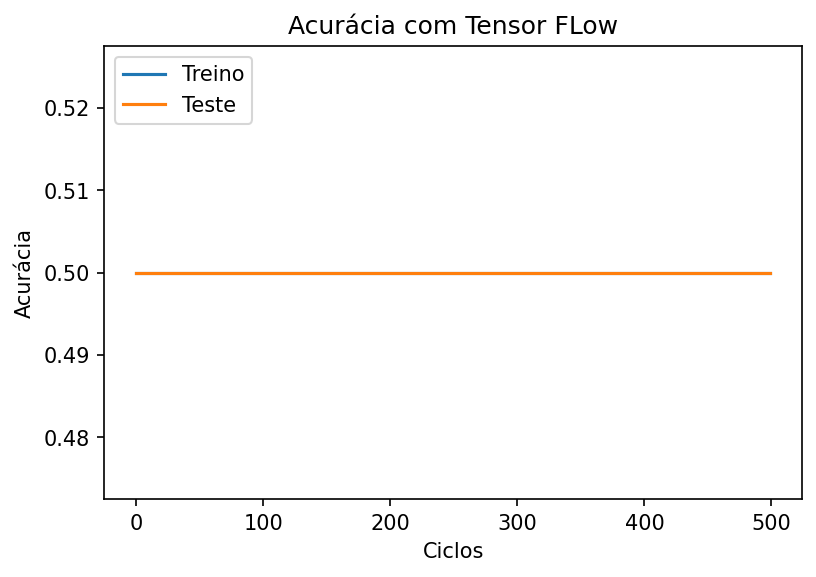

In [70]:
import matplotlib

import matplotlib.pyplot as plt



matplotlib.rcParams['figure.dpi'] = 150



# Plot acurácia de treino e teste

plt.plot(history.history['binary_accuracy'])

plt.plot(history.history['val_binary_accuracy'])

plt.title('Acurácia com Tensor FLow')

plt.ylabel('Acurácia')

plt.xlabel('Ciclos')

plt.legend(['Treino', 'Teste'], loc='upper left')

plt.show()